# Scale-invariant feature transform

In [1]:
import cv2
import matplotlib.pyplot as plt

<img src = 'harris.png' />


<img src = 'robust.png' />

## Scale space

<img src ='scale_space.png'/>

### Laplacian of Gaussian (LoG)

# $\nabla^2 f(x) = \frac{\partial^2 f}{\partial x^2}+ \frac{\partial^2 f}{\partial y^2}$

# $f(x,y) = x^3+2xy+y^4$

# $\nabla^2 f = 6x+2 + 2+12y^2 = 6x+12y^2+4$

$lim_{\delta x\rightarrow 0} \frac{f(x+\delta x) -f(x)}{\delta x}$

## $\frac{\partial^2 f}{\partial x^2} \approx f(x+1)+f(x-1)-2f(x) \rightarrow \begin{bmatrix}
1 & -2 & 1
\end{bmatrix}$

## $\frac{\partial^2 f}{\partial y^2} = f(y+1)+f(y-1)-2f(y) \rightarrow \begin{bmatrix}
1 \\
-2 \\
1
\end{bmatrix}$


## $\begin{bmatrix}
0 & 1 & 0\\
1 & -4 & 1\\
0 & 1 & 0
\end{bmatrix}$

##  LoG:


## $\nabla^2(f*g) = f*\nabla^2 g$

<img src = 'scale.jpg' width = 500/>

In [2]:
img = cv2.imread('house.jpg')

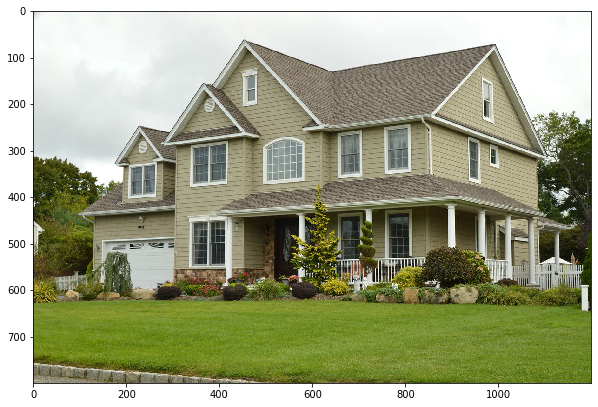

In [3]:
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [4]:
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [5]:
sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(gray,None)

In [6]:
img = cv2.drawKeypoints(img,kp,img)

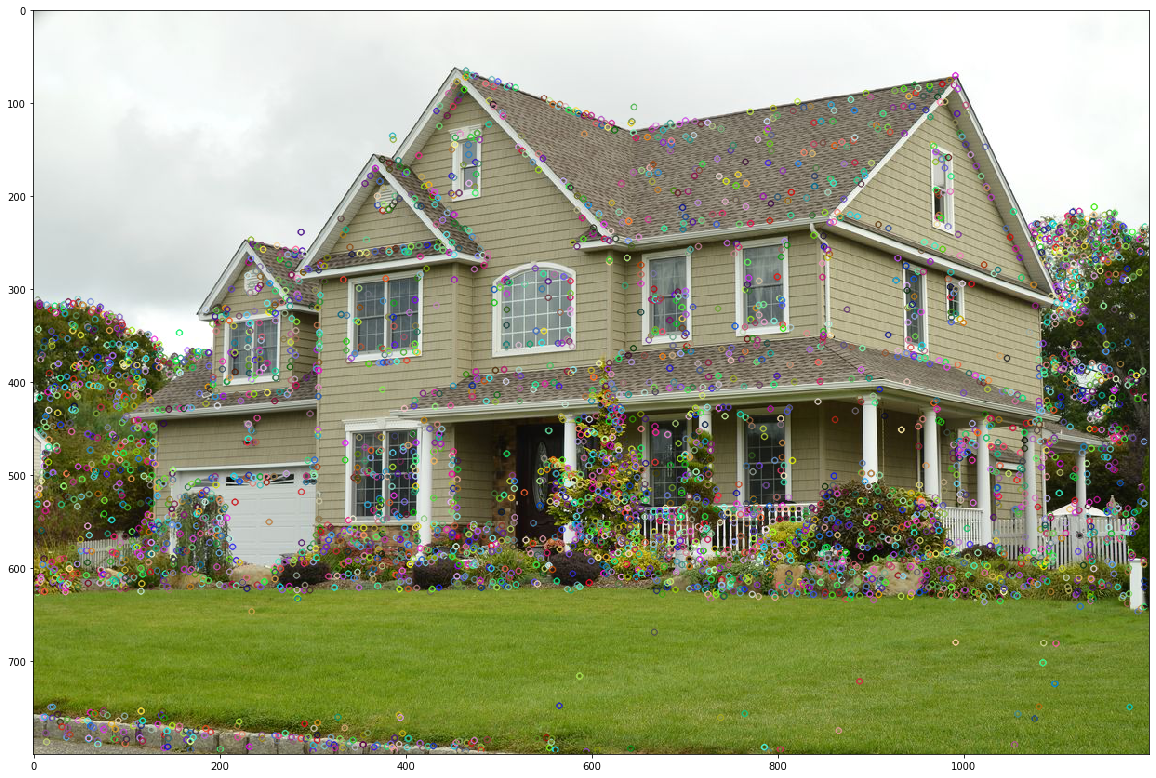

In [7]:
plt.figure(figsize=(20,20))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [8]:
kp,des = sift.compute(gray,kp)

In [9]:
des[4]

array([ 18.,  19.,  26.,  42.,  32.,  16.,  11.,   8.,  70.,  35.,  26.,
        89.,  38.,  45.,  79.,  34., 141.,  67.,   5.,   2.,   1.,   1.,
         9.,  22.,  13.,  10.,   3.,   1.,   2.,   1.,   1.,   1.,   2.,
       112., 141.,   6.,   6.,  47.,  30.,   2.,  24.,  61., 141.,  84.,
         5.,  23.,  53.,  14., 141., 141.,  50.,  17.,   1.,   1.,   6.,
        16.,  46.,  24.,   1.,   0.,   2.,   1.,   1.,   8.,   9.,  33.,
        37.,   2.,  29., 141.,  92.,  15.,  30.,  16.,  64.,  17.,   2.,
        50., 141.,  48., 141.,  25.,   8.,   2.,   0.,   7.,  17.,  53.,
        51.,   3.,   0.,   0.,   0.,   0.,   0.,  12.,   7.,  13.,   0.,
         0.,  13.,  42.,   6.,   1.,   1.,   0.,   0.,   0.,   1.,  11.,
        14.,   4.,   7.,   0.,   0.,   0.,   0.,   1.,   1.,   1.,   1.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.], dtype=float32)

# Speed-up robust features
# SURF

In [16]:
img = cv2.imread('house.jpg')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [17]:
surf = cv2.xfeatures2d.SURF_create()
kp = sift.detect(gray,None)

In [18]:
img=cv2.drawKeypoints(img,kp,img)

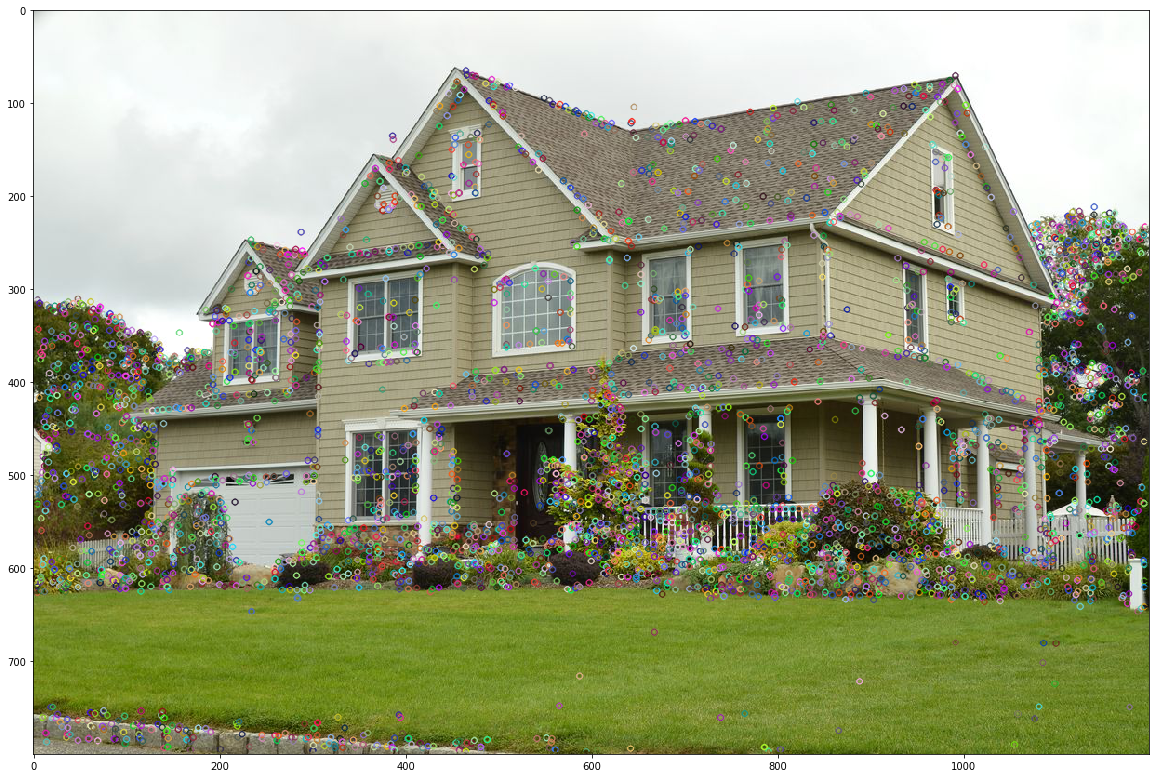

In [30]:
plt.figure(figsize=(20,20))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [20]:
kp,des = sift.compute(gray,kp)

In [15]:
des[0]

array([ 10.,   0.,   7.,  26.,  17.,   9.,  22., 103.,  16.,   0.,   1.,
         5.,   1.,  14., 126., 126.,   0.,   0.,   0.,   0.,   0.,  13.,
        50.,  21.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  66.,
         4.,   0.,   0.,   1.,  16.,  94., 126., 126.,   7.,   0.,   0.,
         0.,  19., 102., 126.,  12.,   3.,   1.,   9.,   5.,  19., 126.,
        30.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0., 126.,  80.,
         0.,   1.,   3.,  33.,  70.,  52., 126.,  60.,   7.,   7.,   9.,
        17.,  43.,  50.,  40.,  32.,  11.,  48.,  25.,  19.,  44.,  16.,
         0.,   0.,   0.,   4.,   2.,   4.,   9.,   0., 126.,  56.,  20.,
        26.,  10.,   5.,  10.,  31., 119.,  68.,  27.,  59.,  25.,   7.,
         9.,  12.,  99.,  52.,  27.,  18.,   7.,  16.,  44.,  23.,   1.,
         1.,   5.,  11.,   3.,   5.,  12.,   0.], dtype=float32)

In [23]:
kp, des = sift.detectAndCompute(gray,None)

In [29]:
des[2]

array([ 25.,  11.,  31.,  16.,   5.,  15.,  44.,  39.,  39.,  17.,  30.,
        96.,  40.,  12.,  13.,  65.,   6., 104.,  61.,  90.,  33.,  18.,
         4.,   2.,  10.,  66.,  15.,   8.,   3.,   4.,  10.,  12.,  42.,
        41., 137.,  51.,   8.,   2.,   3.,   8., 137.,  61.,  44.,  27.,
        35.,  87.,  44.,  42.,  23.,  69.,   7.,  18., 123., 137.,  36.,
         8.,  74., 137.,   8.,   2.,  14.,   8.,   1.,   4.,  44.,   5.,
         8.,  12.,   2.,   0.,   0.,  14., 137.,  25.,   2.,   9.,  34.,
        13.,   6.,  36.,  23.,  12.,   2.,  22., 137.,  96.,  13.,   4.,
        20., 105.,  13.,   3.,  43.,  40.,  32.,   6.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   7.,   0.,   0.,   2.,   6.,   0.,
         0.,   2.,   1.,   0.,   0.,   7.,  62.,  23.,  13.,   1.,   0.,
         1.,   2.,   0.,  18.,  64.,  47.,   3.], dtype=float32)

# Tomar 10 fotos consecutivas que tengan un solapamiento considerable

# Calcular SIFT o SURF (detect and compute)
